In [12]:
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set() #for plot styling
plt.rcParams['figure.figsize']=(16,9)  #set pkot figure size
plt.style.use('ggplot')  #set plot theme

In [13]:
dataMovie = pd.read_csv('movie.csv')

In [14]:
dataMovie.shape

(5043, 28)

In [15]:
dataMovie.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0


In [17]:
dataMovie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [19]:
dataLikes=dataMovie.iloc[:,4:6]
dataLikes

,director_facebook_likes,actor_3_facebook_likes
0,0,855
1,563,1000
2,0,161
3,22000,23000
4,131,49
...,...,...
5038,2,318
5039,49,319
5040,0,0
5041,0,489


In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(dataLikes)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
kmeans.cluster_centers_  #print 5 centroids' positions

array([[  151.29382199,   420.67350785],
       [12490.38461538,   605.93269231],
       [  210.77011494, 11126.43678161],
       [17621.21212121,   596.10606061],
       [17545.45454545, 14545.45454545]])

In [23]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [24]:
len(kmeans.labels_)

5043

In [26]:
unique,counts=np.unique(kmeans.labels_,return_counts=True)
dict(zip(unique,counts))       #show the labels and how many samples in each label

{0: 4775, 1: 104, 2: 87, 3: 66, 4: 11}

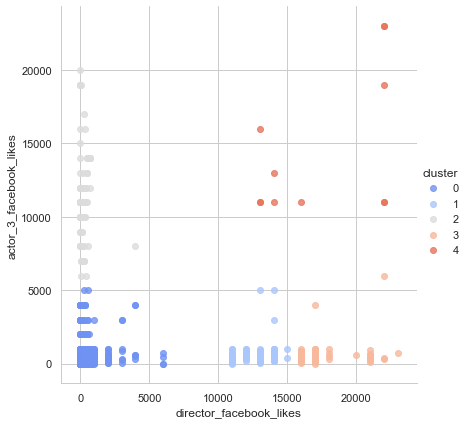

In [30]:
#plot data
dataLikes['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes','actor_3_facebook_likes',data=dataLikes,hue='cluster',
          palette='coolwarm',height=6,aspect=1,fit_reg=False)